In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import SMA, GOOG

"""
# set user inputted variables 
commission = .003


# SMA strategy
class mySMAStrategy(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 10)
        self.ma2 = self.I(SMA, price, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

backtest = Backtest(GOOG, mySMAStrategy, commission = commission, exclusive_orders=True)
stats = backtest.run()

print(stats)

"""

In [6]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt

In [12]:
# import data from wikipedia
tickers = pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]

In [13]:
# get list of all tickers 
tickers = tickers.Symbol.to_list()

In [14]:
# replace . with -
tickers = [i.replace(".", "-") for i in tickers]

In [17]:
# calculate rsi of asset
def RSIcalc(asset):
    df = yf.download(asset, start='2011-01-01')
    df['MA200'] = df['Adj Close'].rolling(window=200).mean()
    df['price change'] = df['Adj Close'].pct_change()

    df["Upmove"] = df['price change'].apply(lambda x: x if x > 0 else 0)
    df['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)

    df['avg Up'] = df['Upmove'].ewm(span=19).mean()
    df['avg Down'] = df['Downmove'].ewm(span=19).mean()

    df = df.dropna()

    df['RS'] = df['avg Up'] / df['avg Down']
    df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
    df.loc[(df['Adj Close'] > df['MA200']) & (df['RSI'] < 30), 'Buy'] = "Yes"
    df.loc[(df['Adj Close'] < df['MA200']) | (df['RSI'] > 30), 'Buy'] = "No"
    return df

In [18]:
RSIcalc(tickers[0])

[*********************100%***********************]  1 of 1 completed


/tmp/ipykernel_2093/1205542828.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up'] / df['avg Down']
/tmp/ipykernel_2093/1205542828.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/tmp/ipykernel_2093/1205542828.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,Open,High,Low,Close,Adj Close,Volume,MA200,price change,Upmove,Downmove,avg Up,avg Down,RS,RSI,Buy
Date,,,,,,,,,,,,,,,
2011-10-17,78.629997,79.050003,75.660004,75.879997,54.155533,4359500,62.510946,-0.038154,0.000000,0.038154,0.010029,0.010096,0.993421,49.834995,No
2011-10-18,76.180000,79.150002,75.709999,78.360001,55.925510,4167200,62.486568,0.032683,0.032683,0.000000,0.012295,0.009086,1.353124,57.503297,No
2011-10-19,78.260002,78.860001,77.269997,77.699997,55.454464,3865000,62.460256,-0.008423,0.000000,0.008423,0.011065,0.009020,1.226769,55.091880,No
2011-10-20,77.769997,79.059998,77.110001,78.680000,56.153893,4087300,62.437441,0.012613,0.012613,0.000000,0.011220,0.008118,1.382138,58.020906,No
2011-10-21,79.379997,80.559998,78.980003,80.480003,57.438560,5125200,62.422905,0.022878,0.022878,0.000000,0.012386,0.007306,1.695270,62.897962,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17,111.959999,113.040001,110.680000,112.989998,112.989998,2827700,125.274520,0.008839,0.008839,0.000000,0.006136,0.007508,0.817206,44.970477,No
2023-02-21,112.000000,112.400002,109.180000,109.250000,109.250000,3889100,125.083597,-0.033100,0.000000,0.033100,0.005522,0.010068,0.548526,35.422475,No
2023-02-22,109.529999,110.379997,108.510002,108.940002,108.940002,2655000,124.913922,-0.002838,0.000000,0.002838,0.004970,0.009345,0.531870,34.720322,No


In [19]:
def getSignals(df):
    Buying_dates = []
    Selling_dates = []

    for i in range(len(df)):
        if "Yes" in df["Buy"].iloc[i]:
            Buying_dates.append(df.iloc[i+1].name)
            
            for j in range(1,11):
                if df['RSI'].iloc[i + j] > 40:
                    Selling_dates.append(df.iloc[i+j+1].name)
                    break
                elif j == 10:
                    Selling_dates.append(df.iloc[i+j+1].name)
    return Buying_dates, Selling_dates

In [20]:
frame = RSIcalc(tickers[0])
buy, sell = getSignals(frame)

[*********************100%***********************]  1 of 1 completed


/tmp/ipykernel_2093/1205542828.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RS'] = df['avg Up'] / df['avg Down']
/tmp/ipykernel_2093/1205542828.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df['RS'].apply(lambda x: 100-(100/(x+1)))
/tmp/ipykernel_2093/1205542828.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

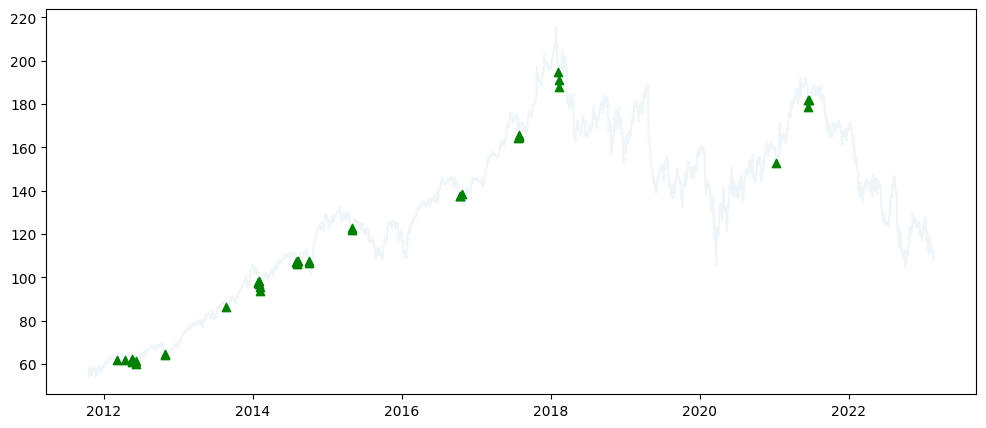

In [23]:
plt.figure(figsize=(12,5))
plt.scatter(frame.loc[buy].index, frame.loc[buy]['Adj Close'], marker = '^', c='g')
plt.plot(frame['Adj Close'], alpha=.07)

In [25]:
# calculate profits of first ticker
Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
Profits

array([ 0.01841858,  0.01323802, -0.0115183 , -0.01105814,  0.00212315,
        0.01287556,  0.03632401,  0.02847867,  0.01033357,  0.01558087,
        0.01012236, -0.00346098,  0.00108178, -0.00407378,  0.02345979,
        0.01052883,  0.02759942,  0.00556546,  0.00556546,  0.01286469,
        0.0062834 ,  0.01170129,  0.01861865,  0.01306246,  0.0130085 ,
        0.01320242, -0.00076654,  0.00355307, -0.01841872,  0.01366927,
        0.02033747,  0.01195283,  0.01595001,  0.00852711,  0.02154845,
        0.00861573,  0.01892706, -0.0052846 ,  0.01409035,  0.01120925])

In [27]:
# winning rate 
wins = [i for i in Profits if i >0]
len(wins)/ len(Profits)

0.825